# This is the script to make the coco json file for waymo dataset with our own annotation format. 

In [8]:
import os
import cv2
import json, yaml
import numpy as np
from PIL import Image
from collections import OrderedDict
from pycocotools import mask as cocomask
from pycocotools import coco as cocoapi
import matplotlib.pyplot as plt

In [3]:
datapath = '/home/claude/Data/DAVIS/'

In [5]:
info = {"year" : 2016,
             "version" : "1.0",
             "description" : "A Benchmark Dataset and Evaluation Methodology for Video Object Segmentation (DAVIS)",
             "contributor" : "F. Perazzi, J. Pont-Tuset, B. McWilliams, L. Van Gool, M. Gross, A. Sorkine-Hornung ",
             "url" : "http://davischallenge.org/",
             "date_created" : "2016"
            }
licenses = [{"id": 1,
                  "name": "Attribution-NonCommercial",
                  "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
                 }]
type = "instances"

In [6]:
type

'instances'

In [14]:
seqs = yaml.full_load(open(os.path.join(datapath, "Annotations", "db_info.yml"), "r"))["sequences"]

In [18]:
seqs

[{'attributes': ['DEF'],
  'name': 'bear',
  'num_frames': 82,
  'set': 'training',
  'eval_t': True},
 {'attributes': [],
  'name': 'blackswan',
  'num_frames': 50,
  'set': 'test',
  'eval_t': True},
 {'attributes': ['LR',
   'SV',
   'SC',
   'FM',
   'CS',
   'IO',
   'MB',
   'OCC',
   'HO',
   'EA',
   'OV'],
  'name': 'bmx-bumps',
  'num_frames': 90,
  'set': 'training',
  'eval_t': False},
 {'attributes': ['LR',
   'SV',
   'SC',
   'FM',
   'CS',
   'IO',
   'MB',
   'DEF',
   'OCC',
   'HO',
   'EA',
   'BC'],
  'name': 'bmx-trees',
  'num_frames': 80,
  'set': 'test',
  'eval_t': False},
 {'attributes': ['SC', 'DB', 'EA', 'BC'],
  'name': 'boat',
  'num_frames': 75,
  'set': 'training',
  'eval_t': True},
 {'attributes': ['FM', 'DB', 'MB', 'DEF', 'HO', 'ROT', 'OV', 'AC'],
  'name': 'breakdance',
  'num_frames': 84,
  'set': 'test',
  'eval_t': False},
 {'attributes': ['FM', 'CS', 'MB', 'DEF', 'HO', 'ROT'],
  'name': 'breakdance-flare',
  'num_frames': 71,
  'set': 'training'

In [45]:
def waymo_anno_class_relabel(annotation):
    """
    Reassign the indices of the objects in annotation(PointCloud);
    :parameter annotation: 0->ignore, 1->vehicle, 2->pedestrian, 3->sign,
                            4->cyclist, 5->background
    :return annotation: 0->background+sign, 1->vehicle
                            2->pedestrian+cyclist, 3->ingore
    """
    annotation = np.array(annotation)

    mask_ignore = annotation == 0
    mask_sign = annotation == 3
    mask_cyclist = annotation == 4
    mask_background = annotation == 5

    annotation[mask_sign] = 0
    annotation[mask_background] = 0
    annotation[mask_cyclist] = 2
    annotation[mask_ignore] = 3

    return annotation

In [67]:
anno = Image.open('../test_images/test_anno.png')

In [68]:
anno_relabel = waymo_anno_class_relabel(anno)

In [69]:
mask_bg = anno_relabel == 0
mask_vehicle = anno_relabel == 1
mask_human = anno_relabel == 2
mask_other = anno_relabel == 3

anno_relabel[mask_bg] = 0
anno_relabel[mask_human] = 0
anno_relabel[mask_other] = 0
anno_relabel[mask_vehicle] = 255

In [70]:
anno_relabel

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

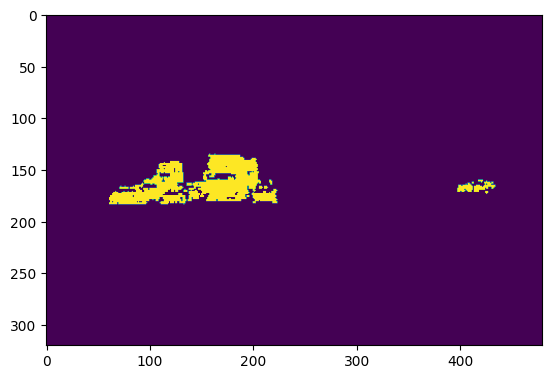

In [71]:
plt.imshow(anno_relabel)

In [72]:
contours, _ = cv2.findContours(anno_relabel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [73]:
contours

[array([[[425, 171]],
 
        [[425, 172]],
 
        [[426, 173]],
 
        [[427, 172]],
 
        [[427, 171]]], dtype=int32),
 array([[[134, 169]],
 
        [[133, 170]],
 
        [[133, 171]],
 
        [[136, 171]],
 
        [[136, 170]],
 
        [[135, 170]]], dtype=int32),
 array([[[211, 166]],
 
        [[211, 168]],
 
        [[213, 168]],
 
        [[214, 167]],
 
        [[213, 166]]], dtype=int32),
 array([[[206, 166]],
 
        [[206, 168]],
 
        [[208, 168]],
 
        [[209, 167]],
 
        [[208, 166]]], dtype=int32),
 array([[[ 72, 166]],
 
        [[ 71, 167]],
 
        [[ 71, 168]],
 
        [[ 79, 168]],
 
        [[ 79, 167]],
 
        [[ 77, 167]],
 
        [[ 76, 166]],
 
        [[ 75, 167]],
 
        [[ 73, 167]]], dtype=int32),
 array([[[408, 163]],
 
        [[408, 164]],
 
        [[407, 165]],
 
        [[406, 164]],
 
        [[405, 165]],
 
        [[403, 165]],
 
        [[402, 166]],
 
        [[401, 165]],
 
        [[399, 165]],
 

In [74]:
[x, y, w, h] = cv2.boundingRect(anno_relabel)

In [75]:
x, y, w, h

(61, 135, 374, 49)

In [78]:
img = anno_relabel.copy()
image = cv2.rectangle(img, (x, y),(x+w, y+h),(255, 255,255), 2)

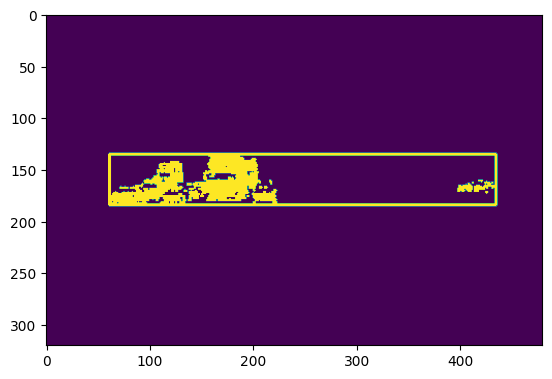

In [79]:
plt.imshow(image)

In [ ]:
cv2.drawContours(anno_relabel, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', anno_relabel) 
cv2.waitKey(0) 
cv2.destroyAllWindows()


In [10]:
anno_relabel_color = cv2.cvtColor(anno_relabel, cv2.COLOR_GRAY2BGR)

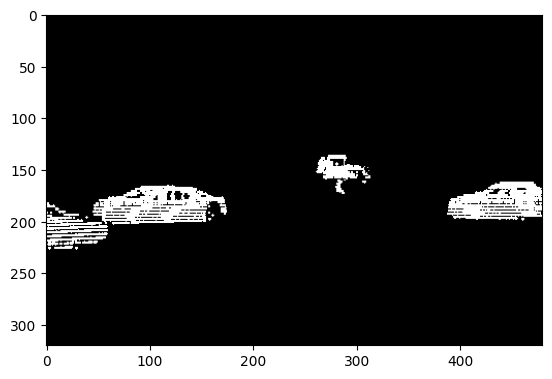

In [11]:
plt.imshow(anno_relabel_color)

In [16]:
contours, _ = cv2.findContours(anno_relabel, cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(4.5.2) /tmp/pip-req-build-947ayiyu/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
 mask = np.array(Image.open(os.path.join(self.datapath + annotpath)).convert('L'))